# Analyzing One Categorical Variable #

In this notebook we will learn:

- How to analyze a single (binary) categorical variable using the binomial test function
- About and how to use the 1-sample z-proportion test
- How to analyze a single categorical variable using a Goodness-of-fit test
- How we could use simulations to do the above

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from scipy import stats

# Hypothesis Testing #

## Sample in Two Categories ##

## Example 1 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Mo: Are you kidding? It's late more often than that!

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of "late" is more than 70%

$H_o : \pi = 0.7$

$H_a: \pi > 0.7$


## Example 2 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Po: Jo, stop whining. It's not late that often.

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of late < 70%

$H_o : \pi = 0.7$

$H_a: \pi < 0.7$


## Example 3 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Bo: Jo, that's just not true.

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of late is not 70%

$H_o : \pi = 0.7$

$H_a: \pi \not= 0.7$


## Example 1 Simulated ##

Let's use a simulation to work example 1.  


In [4]:
# The simulation will be under the null hypothesis.

null_proportions = make_array(0.7, 0.3)

In [5]:
# Define a function that simulates ONE value of the difference between the sample proportion and the null

# This code depends on the null hypothesis and the choice of statistic.

def distance_under_null():
    proportion_late = sample_proportions(200, null_proportions).item(0)
    return (proportion_late - 0.7)

# Note: If you want to use counts instead of proportions, multiply by sample size
# If you want to use percents instead of proportions, multiply by 100

In [6]:
# Simulate 10,000 values of the test statistic
# and collect them in an array.
# This code always looks the same.

np.random.seed(3)

distances = make_array()
for i in np.arange(10000):
    distances = np.append(distances, distance_under_null())

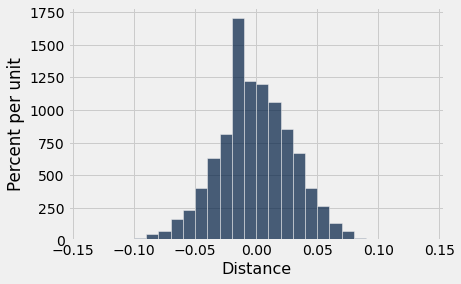

In [7]:
# If the null is true, this is how the statistic should behave

distance_tbl = Table().with_column('Distance', distances)
distance_tbl.hist(bins=np.arange(-0.14, 0.14, 0.01))

In [8]:
# Until now, we haven't needed to use what was actually observed.
# But at this point we have to compare the null prediction with the observed statistic.

# Suppose the data are 150 times late out of 200 times

observed_statistic = abs(150/200 - .7)
observed_statistic

0.050000000000000044

In [9]:
empirical_p = np.count_nonzero(distances >= observed_statistic) / 10000
empirical_p

0.0659

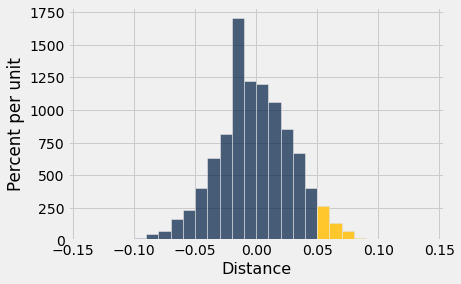

In [10]:
distance_tbl.hist(bins=np.arange(-0.14, 0.14, 0.01), left_end = observed_statistic)

Interpreting the P-value:
It is the chance, assuming that the bus is late 70% of the time, that we get a statistic that is 0.05 or greater.

That chance is 6.6%, which is greater than the $\alpha$ of 5% that we usually use. So if the null is true there is a decent chance of getting the statistic that was actually observed or one that looks even more like the alternative. So the data are consistent with the null.

### Reporting out ###

#### With a simulated p-value of 0.0659, we conclude that the bus is not late greater than 70% of the time. ###

## Binomial Test

There are tests in the scipy.stats module that does the same thing, only much faster.  

One of those tests is the binomial test.

When you have two groups, you pick one group and consider it "success".  Then the test needs to know how many successes you observed, in how many trials and what the null hypothesis believes the probability of success is.  You also have the opportunity to set an alternative hypothesis with a direction.  If you don't, the test will default to a two-tailed alternative.  

In [11]:
import scipy.stats

scipy.stats.binom_test(150, 200, p = 0.7, alternative="greater")

0.06954527985344319

Let $\pi$ refer to the true population proportion of times the bus is late.  Then we have the following.

$H_o: \pi = 0.7$

$H_a: \pi > 0.7$

With $p \approx 0.069$, this test does not lead to rejecting the null hypothesis.  

### Change the data to make a new example ###

What if the bus was late 155 out of 200 times?  Would that be enough evidence to reject the null that the proportion is 70%?

In [12]:
observed_statistic = 155/200 - 0.7

observed_statistic

0.07500000000000007

In [13]:
np.count_nonzero(distances >= observed_statistic) / 10000

0.0101

In [14]:
import scipy.stats

scipy.stats.binom_test(155, 200, p=0.7, alternative = "greater")

0.011127316096936513

Since the p-values are not exactly the same, we must naturally wonder when do the tradtional hypothesis test (the binomial test) and the simulation approach agree or disagree.  Let's run a series of tests both ways and see when they agree and how.  

We'll keep the number of trials fixed at 200 and vary the number of successes (a late bus), and record the p-values for both types of tests.  

In [15]:
for i in np.arange(20):
    observed_statistic = ((170-i)/200 - .7)
    emp_p = np.count_nonzero(distances >= observed_statistic) / 10000
    the_p = scipy.stats.binom_test(170-i, 200, p=0.7, alternative = "greater")
    if emp_p < 0.05 and the_p < 0.05:
        print("Both tests significant at ", 170-i, ":  emp_p =", emp_p, "and theoretic_p =", the_p)
    elif emp_p < .05 and the_p >0.05:
        print("Simulation Test only significant at", 170-i, ":  emp_p =", emp_p, "and theoretic_p =", the_p)
    elif emp_p > 0.05 and the_p > 0.05:
        print("Both tests INsignificant at ", 170-i, ":  emp_p =", emp_p, "and theoretic_p =", the_p)
    elif emp_p >0.05 and the_p <0.05:
        print("Binomial Test only significant", 170-i, ":  emp_p =", emp_p, "and theoretic_p =", the_p)
        


Both tests significant at  170 :  emp_p = 0.0 and theoretic_p = 6.51696901405308e-07
Both tests significant at  169 :  emp_p = 0.0 and theoretic_p = 1.5718528891338772e-06
Both tests significant at  168 :  emp_p = 0.0 and theoretic_p = 3.654527379215966e-06
Both tests significant at  167 :  emp_p = 0.0 and theoretic_p = 8.198544448485e-06
Both tests significant at  166 :  emp_p = 0.0 and theoretic_p = 1.7763891304384996e-05
Both tests significant at  165 :  emp_p = 0.0 and theoretic_p = 3.72069228727048e-05
Both tests significant at  164 :  emp_p = 0.0001 and theoretic_p = 7.539859202475822e-05
Both tests significant at  163 :  emp_p = 0.0003 and theoretic_p = 0.00014794801759545164
Both tests significant at  162 :  emp_p = 0.0003 and theoretic_p = 0.0002813189540769543
Both tests significant at  161 :  emp_p = 0.0004 and theoretic_p = 0.0005187485333077091
Both tests significant at  160 :  emp_p = 0.0008 and theoretic_p = 0.0009283145574807869
Both tests significant at  159 :  emp_p =

# What does the binomial test do?

The binomial distribution allows people to compute probabilities directly from a formula

That is, if the probability of success is supposed to be $p$ and you conduct $n$ trials, the probability of exactly $k$ successes is given by:

$$Pr(X = k) = \left( \begin{array}{c} n \\ k \end{array} \right) p^k (1-p)^{n-k}$$

So if the null hypothesis is $\pi = 0.7$ and then you collect a sample of 200 and 160 "successes", then the alternative hypothesis is that that the true value of $\pi$ is greater than 0.7.  The p-value for this would be


$$ \sum_{k = 160}^{200} \left( \begin{array}{c} 200 \\ k \end{array} \right) 0.7^k (1-0.7)^{200-k} $$

This might be a complicated formula for us to compute by hand, but it's a simple computation for Python (or any statistical program, really).  In fact, there are several approximation techniques that yield very accurate approximations to the p-value for the binomial test; these allow the computer to make the compuation even faster.  

## Example 2 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Po: Jo, stop whining. It's not late that often.

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of late < 70%

$H_o : \pi = 0.7$

$H_a: \pi < 0.7$




In [16]:
scipy.stats.binom_test(155, 200, p=0.7, alternative = "less")

0.9928489152751627

## Example 3 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Bo: Jo, that's just not true.

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of late is not 70%

$H_o : \pi = 0.7$

$H_a: \pi \not= 0.7$

In [ ]:
scipy.stats.binom_test(155, 200, p=0.7)

## Samples with Multiple Categories ##

Jo: Every single day this bus has a 50% chance of being a bit late, a 20% chance of being very late, and a 30% chance of being on time, regardless of other days.

Po: No it doesn't.

Data: Watch bus for 200 days, note arrivals in the three categories

Null: Every single day this bus has a 50% chance of being a bit late, a 20% chance of being very late, and a 30% chance of being on time, regardless of other days.

Alternative: The null model is wrong.

In [ ]:
null_proportions = make_array(0.5, 0.2, 0.3)

def tvd_under_null():
    in_sample = sample_proportions(200, null_proportions)
    return sum(abs(in_sample - null_proportions))/2

In [ ]:
tvds = make_array()
for i in np.arange(10000):
    tvds = np.append(tvds, tvd_under_null())

In [ ]:
tvd_tbl = Table().with_column('TVD', tvds)
tvd_tbl.hist(bins=np.arange(0, .12, 0.01))

In [ ]:
# This above is the prediction made by the null hypothesis.
# Compare with the data:
# Suppose the data are 1 times a bit late, 55 times very late, 55 times on time

#observed_proportions = make_array(90, 55, 55)/200
observed_proportions = make_array(90, 60, 40)/200

observed_tvd = sum(abs(observed_proportions - null_proportions))/2
observed_tvd

In [ ]:
empirical_p = np.count_nonzero(tvds >= observed_tvd)/10000
empirical_p

Conclusion of test: The data support the hypothesis that the null model is wrong.

Notice that when we had a more crude model ("late 70% of the time") compared to this one ("a bit late 50% of the time, very late 20% of the time, on time 30%), the percent late was 70% in both cases. The observed data were also consistent with each other: 150 late out of 200, compared to 90 "a bit late", 60 "very late", and 50 "on time". The latter is still 150 late.

The tests said the data are consistent with 70% late, but not with 50% a bit late, 20% very late, and 30% on time. That's not surprising. Often, the more detailed specifications you have in your model, the less likely you are to see all of that in the data even if the model is good.

## Chi-square goodness-of-fit 

As usual, there is a faster way to do this, it's called the Chi-squared goodness-of-fit test.  It's in the scipy.stats module and the command is just chisquare.  

Chi is the Greek letter, $\chi$, so you will often see this test referred to as the $\chi^2$ test.  

In [ ]:
observed = make_array(90, 55, 55)
null_count = make_array(0.5, 0.2, 0.3)*200

scipy.stats.chisquare(observed, null_count)

In [ ]:
print(90/200)
55/200


Since it is "a little late" 45% of the time, but "a lot late" 27.5% of the time and on time also 27.5% of the time, we could conclude that it is "a lot late" more often than predicted/believed and on time less often than predicted/believed. 



Could we have used the $\chi^2$ test on the previous example?  Yes, but since this test is designed for three or more groups, it does not accept an alternative hypothesis with a direction.  Thus, we lose some precision, or what in statistics is referred to as 'power'.  See, the p-values are slightly larger with this test than they were with the binomial test.  

In [ ]:
observed = make_array(160, 40)
null_count = make_array(0.7, 0.3)*200

scipy.stats.chisquare(observed, null_count)

## What does a $\chi^2$ test do?

$$\chi^2 = \sum \frac{(Observed - Expected)^2}{Expected}$$

Then it finds the appropriate $\chi^2$ graph, based on the degrees of freedom.  For a goodness-of-fit test, the degrees of freedom are the number of groups minus 1.

In [ ]:
import scipy.stats

from scipy.stats import chi2

rv = chi2(df=5)     #, loc=0, scale=1
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-1,50)
plots.plot(x,y);


rv = chi2(df=10)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 
plots.plot(x,y)

rv = chi2(df=15)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 
plots.plot(x,y)


plots.title("Chi^2 Dist's with 5, 10 and 15 df");

In [ ]:
import IPython
url = "ChiSqr.gif"
iframe = '<iframe src=' + url + ' width=680 height=450></iframe>'
IPython.display.HTML(iframe)

In this case, our degrees of freedom are 2.

In [ ]:
import scipy.stats

from scipy.stats import chi2

rv = chi2(df=2)     #, loc=0, scale=1
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-1,20)
#plots.ylim(-.01, 0.3)
plots.plot(x,y)
plots.fill_between(x, y, where = abs(x) > 7.04, color="r")
plots.title("Chi^2 w/ df = 2 and p-value in red");


## Example: Benfords Law ##

Lec21

In [ ]:
digits = np.arange(1, 10)
benford_model = np.log10(1 + 1/digits)

In [ ]:
benford = Table().with_columns(
    'First digit', digits,
    'Benford model prob', benford_model)
benford.barh('First digit')

In [ ]:
# You don't have to understand how this function works, since it uses Python features from beyond Data 8.
def first_digit(num):
    return int(str(num)[0])

In [ ]:
first_digit(32)

In [ ]:
first_digit(17719087)

In [ ]:
# County populations from the census data
counties = Table.read_table('counties.csv')
counties = counties.where('SUMLEV', 50).select(5,6,9).relabeled(0,'State').relabeled(1,'County').relabeled(2,'Population')
counties.show(3)

In [ ]:
first_digits = counties.apply(first_digit, 'Population')
counties = counties.with_column('First digit', first_digits)
counties.show(3)

In [ ]:
num_counties = counties.num_rows
num_counties

In [ ]:
by_digit = counties.group('First digit')
proportions = by_digit.column('count')/num_counties
by_digit = by_digit.with_columns(
    'Proportion', proportions,
    'Benford proportion', benford_model
)
by_digit.drop('count').barh('First digit')

In [ ]:
import scipy.stats

counts = by_digit.column('count')
digits = np.arange(1, 10)
benford_prediction = np.log10(1 + 1/digits)*num_counties

scipy.stats.chisquare(counts, benford_prediction)

In [ ]:
import scipy.stats

from scipy.stats import chi2

rv = chi2(df=8)     #, loc=0, scale=1
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plots.xlim(-1,29)
#plots.ylim(-.01, 0.3)
plots.plot(x,y)
plots.fill_between(x, y, where = abs(x) > 8.23, color="r")
plots.title("Chi^2 w/ df = 8 and p-value in red");

## 1-Sample z-test for proportions ##

There was a long period of time when statisticians did their work without the aid of a computer.  At that time computations like 

$$ \sum_{k = 160}^{200} \left( \begin{array}{c} 200 \\ k \end{array} \right) 0.7^k (1-0.7)^{200-k} $$

would have taken a **very** long time.  

The statisticians of that time period realized that under certain conditions, the binomial distribution could be closely approximated by the normal distribution.  This approximation gave rise to what we know as the z-test for population proportions.  It serves the same purpose as the binomial test. 

How is it done?  First, find $\displaystyle \hat{p} = \frac{\mathrm{successes}}{\mathrm{trials}}$.

Then find $\displaystyle z = \frac{\hat{p} - p_o}{\sqrt{\frac{p_o(1-p_o)}{n}}}$.

This value of $z$ is from the standard normal distribution, $N(0, 1)$, so find the p-value from that.


### Why discuss this when we already have the binomial test? ##

There are at least two good reasons to discuss this test.

1. The wheels of change can turn very slowly in some fields.  If you go on to use statistics in another academic area, you may encounter people who have not heard of the binomial test, and instead *prefer* the less exact z-test.  Don't argue with them, just use the z-test.

2. As our computers are improving, that also means that the data sets we may be asked to analyze are getting bigger.  When you have a data set with millions of entries in it, we can run into essentially the same problem the statisticians had before computers were being used.  That is, it's still possible to have numbers involved are too big for a binomial test.  When they are that large, the z-test is faster and just as accurate.  

Unfortunately, the scipy.stats module that houses most of the statistical functions we're using does not have a traditional 1-sample z-test for proportions, so we'll just have to write our own.  


In [34]:
def z_prop_test(x, n, p, alternative ="not equal"):
    """x = successes, n = trials, p = null proportion"""
    z = (x/n - p)/(p*(1-p)/n)**0.5
    prob = scipy.stats.norm.sf(z)
    
    if alternative == "greater":
        p_val = prob
    elif alternative == "less":
        p_val = 1 - prob
    else:
        p_val = 2 * min(prob, 1-prob)
    
    print("The test stat is z = {} with a p-value of {}.".format(np.round(z,5), np.round(p_val, 8)))
    

Let's revisit Examples 1 and 3, re-doing the tests with the z-procedure and comparing the results to the binomial test.  

## Example 1 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Mo: Are you kidding? It's late more often than that!

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of "late" is more than 70%

$H_o : \pi = 0.7$

$H_a: \pi > 0.7$



## Example 3 ##
Jo: Every single day this bus has chance 70% of being late, regardless of other days.

Bo: Jo, that's just not true.

Data: Watch bus for 200 days, note whether late or not

Null: Every single day this bus has chance 70% of being late, regardless of other days.

Alternative: Chance of late is not 70%

$H_o : \pi = 0.7$

$H_a: \pi \not= 0.7$

In [39]:
z_prop_test(150, 200, 0.7, "greater")

The test stat is z = 1.54303 with a p-value of 0.06141132


In [37]:
scipy.stats.binom_test(150, 200, p = 0.7, alternative="greater")

0.06954527985344319

In [42]:
z_prop_test(150, 200, 0.7)

The test stat is z = 1.46588 with a p-value of 0.14268048


In [43]:
scipy.stats.binom_test(150, 200, p = 0.7)

0.14233173709397484

## Optional: Continuity Correction ##

It is possible to slightly improve the accuracy of the z-test.  

When $\displaystyle \frac{\mathrm{successes}}{\mathrm{trials}} > p_o$, let $\displaystyle \hat{p} = \frac{\mathrm{successes-0.5}}{\mathrm{trials}}$ instead.

When $\displaystyle \frac{\mathrm{successes}}{\mathrm{trials}} < p_o$, let $\displaystyle \hat{p} = \frac{\mathrm{successes+0.5}}{\mathrm{trials}}$.

In [45]:
z_prop_test(149.5, 200, 0.7, "greater")

The test stat is z = 1.46588 with a p-value of 0.07134024


In [44]:
z_prop_test(149.5, 200, 0.7)

The test stat is z = 1.46588 with a p-value of 0.14268048
